In [ ]:
# Generic imports
import numpy as np
import matplotlib.pyplot as plt
from sklearn.calibration import calibration_curve
from matplotlib.lines import Line2D
from math import pi
from matplotlib.ticker import FuncFormatter
from mpl_toolkits.axes_grid1 import make_axes_locatable



# matplotlib settings
FONTSIZE = 18
plt.show()
plt.rc("font", family="serif", size=FONTSIZE, serif="Charter")
plt.rc("axes", labelsize=FONTSIZE)
plt.rc(
    "text.latex",
    preamble=r"\usepackage{amsmath}\usepackage[bitstream-charter]{mathdesign}",
)
plt.rc("text", usetex=True)

# colors
colors = [f"C{i}" for i in range(5)]

# Figure 2

In [199]:
base_path = ''
names = [f'calibrated_test_predict{i}.npz' for i in range(1, 6)]
bit_names = [f'calibrated_bit_test_predict{i}.npz' for i in range(1, 6)]

def load_data(filenames):
    data = [np.load(base_path + fname) for fname in filenames]
    return [d['prediction'] for d in data], [d['labels'] for d in data]

prob, truth = load_data(names)
probx, truthx = load_data(bit_names)

n_bins = 20
prob_true, prob_pred = zip(*[calibration_curve(t, p, n_bins=n_bins) for t, p in zip(truth, prob)])
prob_truex, prob_predx = zip(*[calibration_curve(t, p, n_bins=n_bins) for t, p in zip(truthx, probx)])

max_len = max(map(len, prob_true))
max_lenx = max(map(len, prob_truex))

def pad_array(arr_list, target_length, masked=False):
    if masked:
        padded = np.ma.masked_array(np.zeros((len(arr_list), target_length)), mask=True)
    else:
        padded = np.zeros((len(arr_list), target_length))
   
    for i, arr in enumerate(arr_list):
        padded[i, :len(arr)] = arr
    return padded

prob_true = pad_array(prob_true, max_len)
prob_pred = pad_array(prob_pred, max_len)
prob_truex = pad_array(prob_truex, max_lenx, masked=True)
prob_predx = pad_array(prob_predx, max_lenx, masked=True)

mean_prob_true, std_prob_true = np.mean(prob_true, axis=0), np.std(prob_true, axis=0)
mean_prob_pred, std_prob_pred = np.mean(prob_pred, axis=0), np.std(prob_pred, axis=0)
mean_prob_truex, std_prob_truex = np.ma.mean(prob_truex, axis=0), np.ma.std(prob_truex, axis=0)
mean_prob_predx, std_prob_predx = np.ma.mean(prob_predx, axis=0), np.ma.std(prob_predx, axis=0)

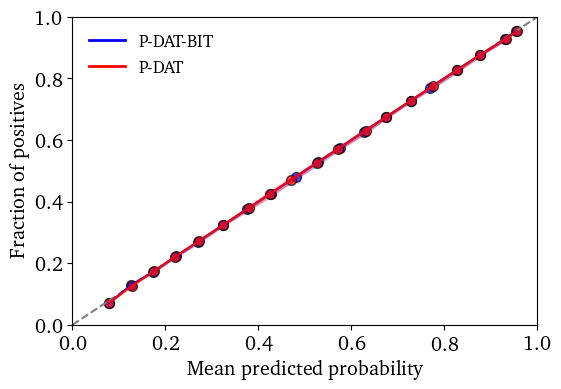

In [200]:
# matplotlib settings
FONTSIZE = 15
plt.show()
plt.rc("font", family="serif", size=FONTSIZE, serif="Charter")
plt.rc("axes", labelsize=FONTSIZE)

fig, axs = plt.subplots(1, 1,figsize=(6,4))
#fig.tight_layout(pad=0.0, w_pad=0.0, h_pad=0.0, rect=(0.07,0.07,0.99,0.99))

axs.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Perfectly calibrated')

for mean_pred, mean_true, std_true, color, label in zip(
        [mean_prob_predx, mean_prob_pred],
        [mean_prob_truex, mean_prob_true],
        [std_prob_truex, std_prob_true],
        ['blue', 'red'],
        ['P-DAT-BIT', 'P-DAT']):
    axs.plot(mean_pred, mean_true, color=color, label=f'{label} Mean Curve')
    axs.fill_between(mean_pred, mean_true - std_true, mean_true + std_true, color=color, alpha=0.2, label=f'{label} Std Band')
    axs.scatter(mean_pred, mean_true, color=color, s=50, alpha=0.7, edgecolor='k')

axs.set_xlim(0, 1)
axs.set_ylim(0, 1)
axs.set_xlabel('Mean predicted probability')
axs.set_ylabel('Fraction of positives')
#plt.title('Calibration Curves', fontsize=18)
axs.legend([Line2D([0], [0], color='blue', lw=2), Line2D([0], [0], color='red', lw=2)], ['P-DAT-BIT', 'P-DAT'], frameon=False, prop={"size": int(FONTSIZE-2)})
plt.savefig('calibration.pdf', bbox_inches='tight')
plt.show()



# Figure 3 left

In [99]:
# matplotlib settings
FONTSIZE = 18
plt.show()
plt.rc("font", family="serif", size=FONTSIZE, serif="Charter")
plt.rc("axes", labelsize=FONTSIZE)

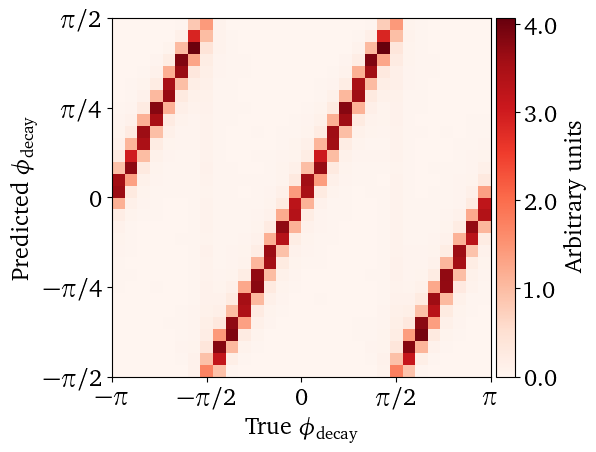

In [141]:
# Make the next plot

data = np.load('SMEFTNET.npy')
x = data[:, 1]  
y = data[:, 0]  

x_edges = np.linspace(-pi, pi, 31)
y_edges = np.linspace(-pi/2, pi/2, 31)

H, xedges, yedges = np.histogram2d(x, y, bins=[x_edges, y_edges])


fig, ax = plt.subplots(1, 1,figsize=(6,4.5))
fig.tight_layout(pad=0.0, w_pad=0.0, h_pad=0.0, rect=(0.12,0.10,0.89,0.99))

im = plt.imshow(H.T, interpolation='nearest', origin='lower',
           extent=[xedges[0], xedges[-1], yedges[0], yedges[-1]], aspect='auto',cmap='Reds')

# Create an axis for the colorbar right next to the main axis
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.05)  # Adjust `pad` to bring it closer

# Add colorbar
cbar = plt.colorbar(im, cax=cax)
cbar.set_label('Arbitrary units')
cbar.formatter = FuncFormatter(lambda x, pos: f"{x / 2000:.1f}")
cbar.update_ticks()
 
ticks1 = [-pi, -pi/2, 0, pi/2, pi] 
tick_labels1 = [r'$-\pi$', r'$-\pi/2$', '0', r'$\pi/2$', r'$\pi$'] 
ticks2 = [-pi/2, -pi/4, 0, pi/4, pi/2] 
tick_labels2 = [r'$-\pi/2$', r'$-\pi/4$', '0', r'$\pi/4$', r'$\pi/2$']
ax.set_xticks(ticks1)
ax.set_xticklabels(tick_labels1)
ax.set_yticks(ticks2)
ax.set_yticklabels(tick_labels2)

ax.set_xlabel(r'True $\phi_{\text{decay}}$')
ax.set_ylabel(r'Predicted $\phi_{\text{decay}}$')
plt.savefig('density_SMEFTNet.pdf')
plt.show()

# Figure 3 right

In [ ]:
# matplotlib settings
FONTSIZE = 18
plt.show()
plt.rc("font", family="serif", size=FONTSIZE, serif="Charter")
plt.rc("axes", labelsize=FONTSIZE)

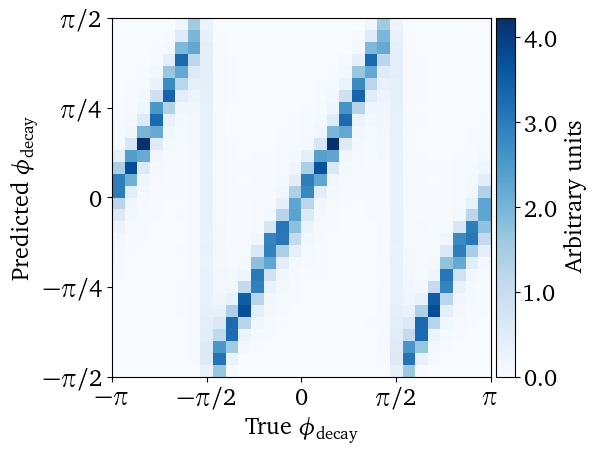

In [143]:
import numpy as np
import matplotlib.pyplot as plt
from math import pi
from matplotlib.ticker import FuncFormatter

data = np.load('BITNET_100%.npy')
x = data[:, 1]  
y = data[:, 0]  

x_edges = np.linspace(-pi, pi, 31)
y_edges = np.linspace(-pi/2, pi/2, 31)

H, xedges, yedges = np.histogram2d(x, y, bins=[x_edges, y_edges])

fig, ax = plt.subplots(1, 1,figsize=(6,4.5))
fig.tight_layout(pad=0.0, w_pad=0.0, h_pad=0.0, rect=(0.12,0.10,0.89,0.99))

im = plt.imshow(H.T, interpolation='nearest', origin='lower',
           extent=[xedges[0], xedges[-1], yedges[0], yedges[-1]], aspect='auto',cmap='Blues')

# Create an axis for the colorbar right next to the main axis
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.05)  # Adjust `pad` to bring it closer

# Add colorbar
cbar = plt.colorbar(im, cax=cax)
cbar.set_label('Arbitrary units')
cbar.formatter = FuncFormatter(lambda x, pos: f"{x / 2000:.1f}")
cbar.update_ticks()
 
ticks1 = [-pi, -pi/2, 0, pi/2, pi] 
tick_labels1 = [r'$-\pi$', r'$-\pi/2$', '0', r'$\pi/2$', r'$\pi$'] 
ticks2 = [-pi/2, -pi/4, 0, pi/4, pi/2] 
tick_labels2 = [r'$-\pi/2$', r'$-\pi/4$', '0', r'$\pi/4$', r'$\pi/2$']
ax.set_xticks(ticks1)
ax.set_xticklabels(tick_labels1)
ax.set_yticks(ticks2)
ax.set_yticklabels(tick_labels2)

ax.set_xlabel(r'True $\phi_{\text{decay}}$')
ax.set_ylabel(r'Predicted $\phi_{\text{decay}}$')
plt.savefig('density_SMEFTNet_BIT.pdf')
plt.show()

# Figure 4 left

In [ ]:
# matplotlib settings
FONTSIZE = 18
plt.show()
plt.rc("font", family="serif", size=FONTSIZE, serif="Charter")
plt.rc("axes", labelsize=FONTSIZE)

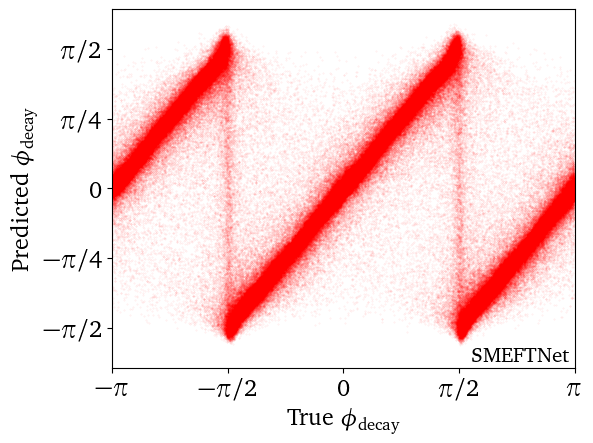

In [193]:
import numpy as np
import matplotlib.pyplot as plt
from math import pi
from matplotlib.ticker import FuncFormatter

data = np.load('SMEFTNET.npy')

x1 = data[:, 1]  
y1 = data[:, 0]


fig, axs = plt.subplots(1, 1,figsize=(6,4.5))
fig.tight_layout(pad=0.0, w_pad=0.0, h_pad=0.0, rect=(0.12,0.10,0.99,0.99))

axs.scatter(x1, y1, color='red', label='SMEFTNet', s=0.1, alpha=1/10, rasterized=True)  

ticks1 = [-pi, -pi/2, 0, pi/2, pi] 
tick_labels1 = [r'$-\pi$', r'$-\pi/2$', '0', r'$\pi/2$', r'$\pi$'] 
ticks2 = [-pi/2, -pi/4, 0, pi/4, pi/2] 
tick_labels2 = [r'$-\pi/2$', r'$-\pi/4$', '0', r'$\pi/4$', r'$\pi/2$'] 
axs.set_xticks(ticks1, tick_labels1)
axs.set_yticks(ticks2, tick_labels2)
axs.set_xlabel(r'True $\phi_\text{decay}$')
axs.set_ylabel(r'Predicted $\phi_\text{decay}$')
axs.set_xlim(-pi, pi)
axs.set_ylim(-pi/2-0.45, pi/2+0.45)
axs.text(pi-0.05, -1.95, r'SMEFTNet', fontsize=FONTSIZE-2, horizontalalignment='right')
plt.savefig('scatter_SMEFTNet.pdf', dpi=200)
plt.show()

# Figure 4 right

In [ ]:
# matplotlib settings
FONTSIZE = 18
plt.show()
plt.rc("font", family="serif", size=FONTSIZE, serif="Charter")
plt.rc("axes", labelsize=FONTSIZE)

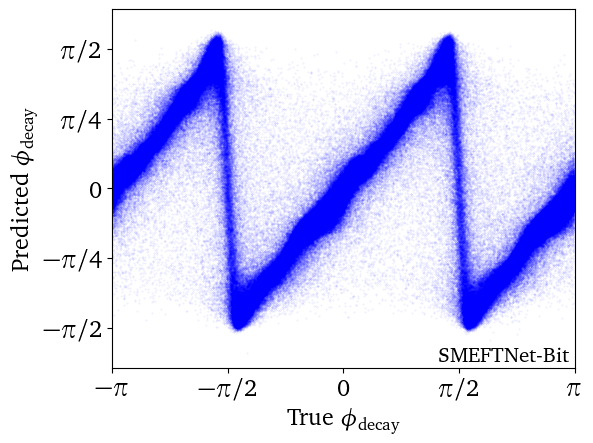

In [196]:
data = np.load('BITNET_100%.npy')

x1 = data[:, 1]  
y1 = data[:, 0]

fig, axs = plt.subplots(1, 1,figsize=(6,4.5))
fig.tight_layout(pad=0.0, w_pad=0.0, h_pad=0.0, rect=(0.12,0.10,0.99,0.99))

axs.scatter(x1, y1, color='blue', label='SMEFTNet', s=0.1, alpha=1/10, rasterized=True)  

ticks1 = [-pi, -pi/2, 0, pi/2, pi] 
tick_labels1 = [r'$-\pi$', r'$-\pi/2$', '0', r'$\pi/2$', r'$\pi$'] 
ticks2 = [-pi/2, -pi/4, 0, pi/4, pi/2] 
tick_labels2 = [r'$-\pi/2$', r'$-\pi/4$', '0', r'$\pi/4$', r'$\pi/2$'] 
axs.set_xticks(ticks1, tick_labels1)
axs.set_yticks(ticks2, tick_labels2)
axs.set_xlabel(r'True $\phi_\text{decay}$')
axs.set_ylabel(r'Predicted $\phi_\text{decay}$')
axs.set_xlim(-pi, pi)
axs.set_ylim(-pi/2-0.45, pi/2+0.45)
axs.text(pi-0.05, -1.95, r'SMEFTNet-Bit', fontsize=FONTSIZE-2, horizontalalignment='right')
plt.savefig('scatter_SMEFTNet_BIT.pdf', dpi=200)
plt.show()



# Figure 6 left

In [292]:
# matplotlib settings
FONTSIZE = 20
plt.show()
plt.rc("font", family="serif", size=FONTSIZE, serif="Charter")
plt.rc("axes", labelsize=FONTSIZE)

def angular_difference(theta1, theta2):
    """Compute the angular difference considering periodicity."""
    delta = theta1 - theta2  # Compute raw difference
    return (delta + np.pi) % (2 * np.pi) - np.pi  # Wrap into [-π, π]

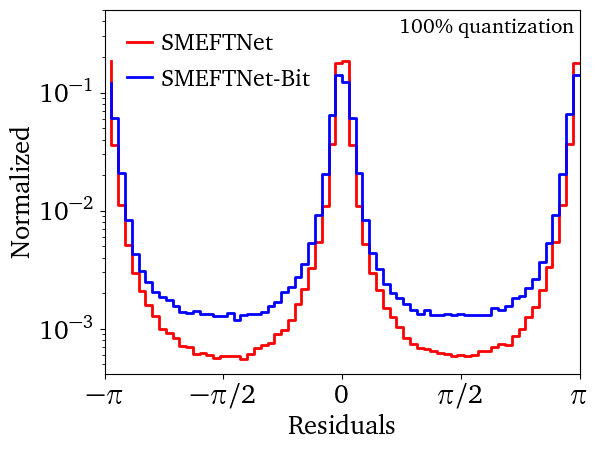

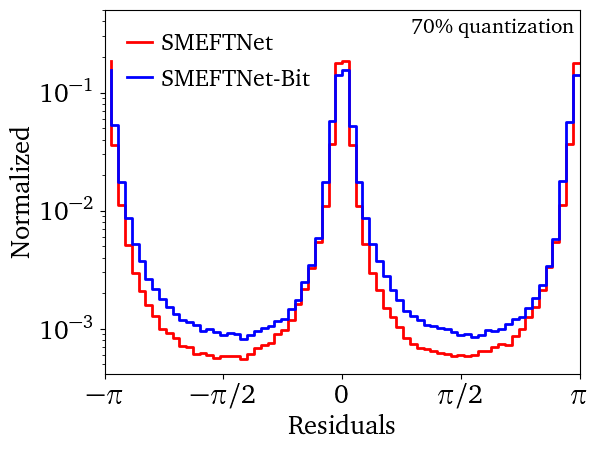

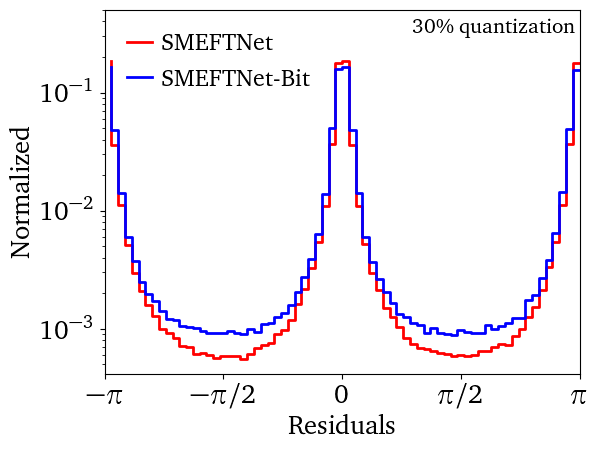

In [295]:
dataA = np.load('SMEFTNET.npy')
data1 = np.load('BITNET_100%.npy')
data2 = np.load('BITNET_70%.npy')
data3 = np.load('BITNET_30%.npy')
label = [100, 70, 30]
data = [data1,data2,data3]

for i, (dataB,label) in enumerate(zip(data,label)):

    x1 = dataA[:, 0]  
    y1 = dataA[:, 1]
    x2 = dataB[:, 0]  
    y2 = dataB[:, 1]
    zA = angular_difference(x1, y1)
    zB = angular_difference(x2, y2)
    totalA = len(zA)
    totalB = len(zB)


    # ========== Make the plot ============
    fig, axs = plt.subplots(1, 1,figsize=(6,4.5))
    fig.tight_layout(pad=0.0, w_pad=0.0, h_pad=0.0, rect=(0.09,0.08,0.99,0.99))

    ya, xa = np.histogram(zA, bins=70, weights=np.ones(totalA)/totalA, range=(-pi, pi))
    yb, xb = np.histogram(zB, bins=70, weights=np.ones(totalB)/totalB, range=(-pi, pi))
    axs.step(xa[1:], ya, color='red',label='SMEFTNet', linewidth=2.0)  
    axs.step(xb[1:], yb, color='blue',label=r'SMEFTNet-Bit', linewidth=2.0)  
    ticks = [-pi,-pi/2, 0, pi/2, pi] 
    tick_labels = [r'$-\pi$', r'$-\pi/2$', '0', r'$\pi/2$', r'$\pi$'] 

    axs.set_xticks(ticks, tick_labels)
    axs.set_yscale("log")

    axs.set_xlim(-pi, pi)
    axs.set_ylim(top=0.5)
    axs.set_xlabel('Residuals')  
    axs.set_ylabel('Normalized')  

    axs.legend(fontsize=FONTSIZE-2, frameon=False, handlelength=1.0, handletextpad=0.4, loc="upper left")
    axs.text(pi-0.05, 0.32, r"${}\%$ quantization".format(label), fontsize=FONTSIZE-4, horizontalalignment='right')
    plt.savefig(f'comparison{i+1}x.pdf')
    plt.show()